In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf

from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
        
train_path = './Datasets/GreenHot(Dataset)/Training/'

In [3]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
for layer in inception.layers[:140]:
    layer.trainable = False
for layer in inception.layers[140:]:
    layer.trainable = True

In [6]:
# flattened = tf.keras.layers.Flatten()(inception.output)
# fc1 = tf.keras.layers.Dense(512, activation='relu', name="AddedDense1")(flattened)
# d = tf.keras.layers.Dropout(0.25)(fc1)
# fc2 = tf.keras.layers.Dense(256, activation='relu', name="AddedDense2")(d)
# d2=tf.keras.layers.Dropout(0.25)(fc2)
# fc3 = tf.keras.layers.Dense(1, activation='softmax', name="AddedDense3")(d2)
# model = tf.keras.models.Model(inputs=inception.input, outputs=fc3)


In [7]:
for i, layer in enumerate(inception.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [8]:
# useful for getting number of output classes
folders = glob('./Datasets/GreenHot(Dataset)/Training/*')

In [9]:
len(folders)

2

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.compile(optimizer='Adamax',  #Adamax , RMSprop , Adagrad, 
              loss='binary_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'])

print("model compiled")
print(model.summary())

model compiled
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________

In [13]:
#Total BFlops
from model_profiler import model_profiler

Batch_size = 32
profile = model_profiler(model, Batch_size)

print(profile)

| Model Profile                    | Value         | Unit    |
|----------------------------------|---------------|---------|
| Selected GPUs                    | None Detected | GPU IDs |
| No. of FLOPs                     | 0.0567        | BFLOPs  |
| GPU Memory Requirement           | 2.0211        | GB      |
| Model Parameters                 | 21.854        | Million |
| Memory Required by Model Weights | 83.3663       | MB      |


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 50

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.5,1.0],
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./Datasets/GreenHot(Dataset)/Training/',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

test_set = validation_datagen.flow_from_directory('./Datasets/GreenHot(Dataset)/Testing/',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'binary')

Found 1244 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [14]:
len(training_set)

25

In [15]:
training_set.class_indices

{'Fire': 0, 'No_Fire': 1}

In [16]:
imgs ,labels = next(training_set)

In [17]:
from matplotlib import pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

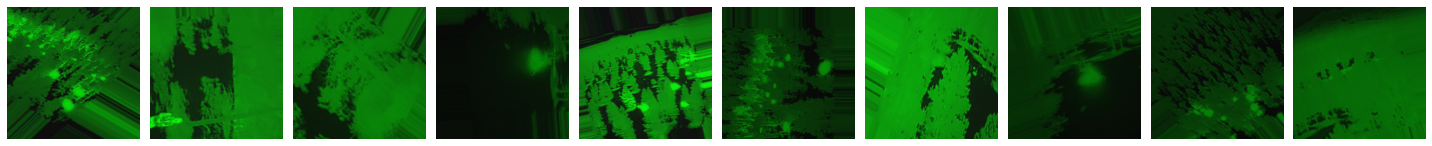

[0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1.]


In [18]:
plotImages(imgs)
print(labels)

In [19]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_IncepV3_GH_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [20]:
history = model.fit(training_set,
          steps_per_epoch= 1000 // batch_size,
          epochs=10, 
          validation_data=test_set,
          validation_steps= 200 // batch_size,
          callbacks=callbacks_list)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8873 - auc: 0.9355 - precision: 0.8634 - recall: 0.8756
Epoch 00001: val_accuracy improved from -inf to 0.72500, saving model to .\FirevsNonFire_IncepV3_GH_transfer_learning_model_weights-improvement-01-0.73.hdf5
20/20 [==============================] - 147s 7s/step - loss: 0.5260 - accuracy: 0.8873 - auc: 0.9355 - precision: 0.8634 - recall: 0.8756 - val_loss: 1.3449 - val_accuracy: 0.7250 - val_auc: 0.8925 - val_precision: 1.0000 - val_recall: 0.4086
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9899 - auc: 0.9989 - precision: 0.9793 - recall: 0.9977
Epoch 00002: val_accuracy improved from 0.72500 to 0.82000, saving model to .\FirevsNonFire_IncepV3_GH_transfer_learning_model_weights-improvement-02-0.82.hdf5
20/20 [==============================] - 141s 7s/step - loss: 0.0331 - accuracy: 0.9899 - auc: 0.9989 - precision: 0.9793 - recall: 0.9977 - val_loss

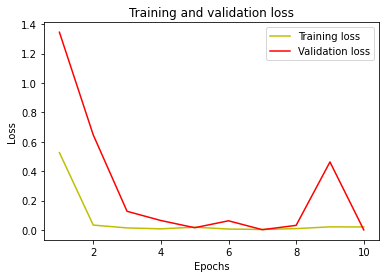

In [21]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

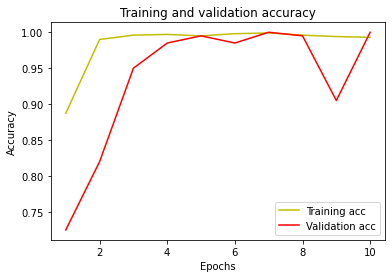

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()